# 1. Matplotlib & PIL

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from PIL import Image
import cv2

In [3]:
img = Image.open('../images/profile_color.jpeg')

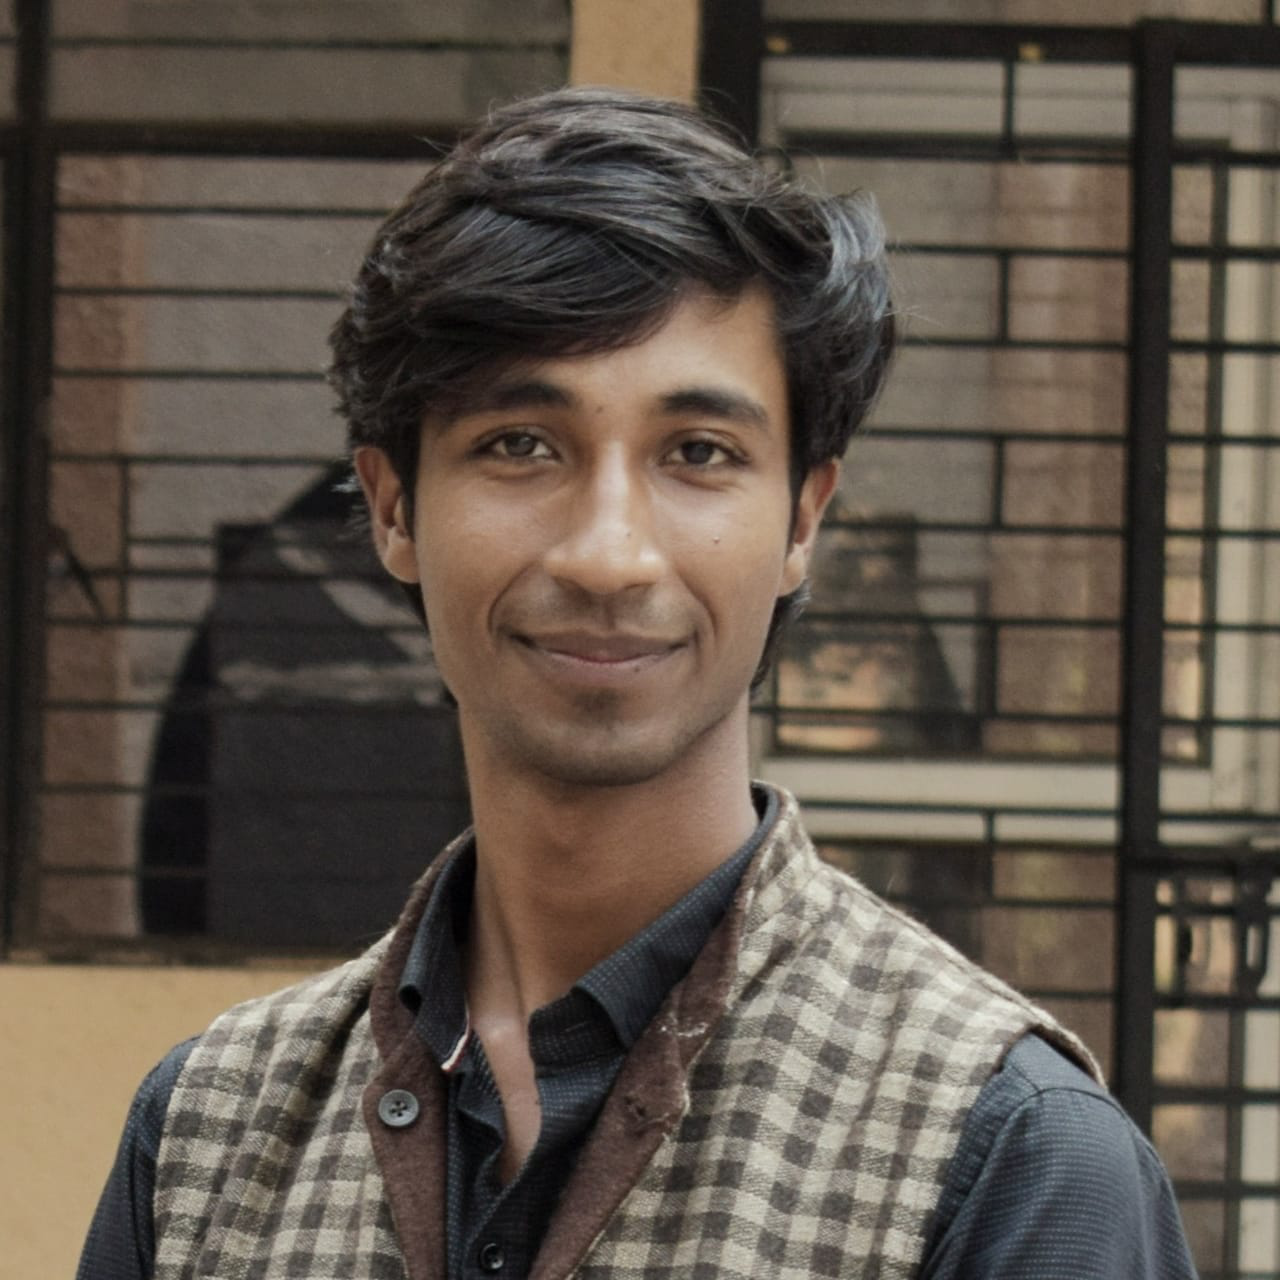

In [4]:
img

<h4>Rotate the image</h4>

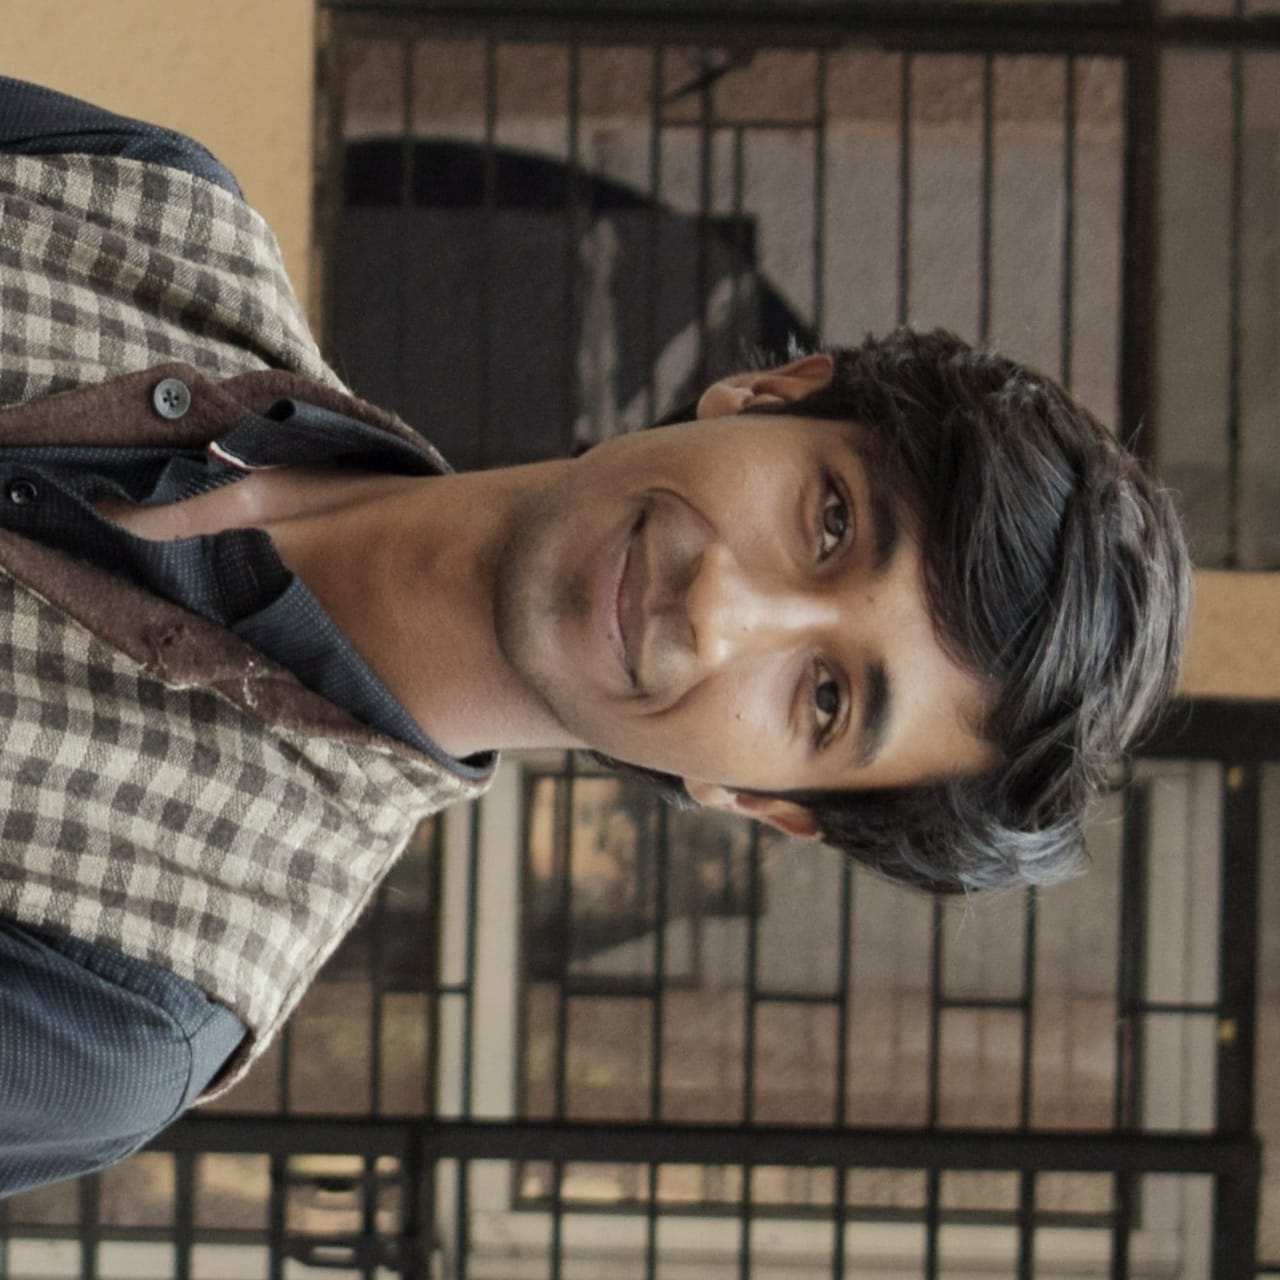

In [5]:
img.rotate(-90)

In [6]:
#Check Type of image
type(img)

PIL.JpegImagePlugin.JpegImageFile

#### Convert JPEG into and array

In [8]:
img_array = np.asarray(img)
print(type(img_array))

<class 'numpy.ndarray'>


#### Get height, width & channels

In [9]:
img_array.shape

(1280, 1280, 3)

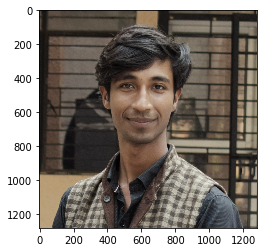

In [10]:
plt.imshow(img_array)    # dimensions are visible on the axes

# 2. RGB Channels

In [11]:
# making copy of image
img_test = img_array.copy()

### Extracting specific channel

<p>The lighter shade in greyscale image will show the higher intensity of that channel in the image</p>

-> Red Channel

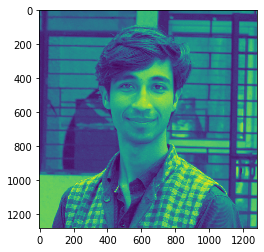

In [13]:
plt.imshow(img_test[:,:,0])

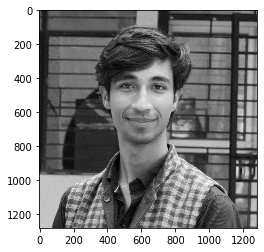

In [14]:
# Scaling Red channel to gray
plt.imshow(img_test[:,:,0], cmap='gray')

-> Green Channel

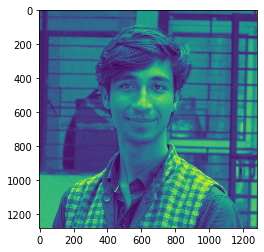

In [15]:
plt.imshow(img_test[:,:,1])

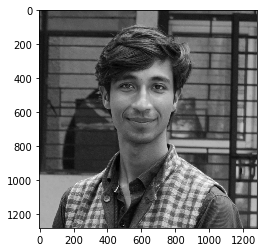

In [16]:
# Scaling Green channel to gray
plt.imshow(img_test[:,:,1], cmap='gray')

-> Blue Channel

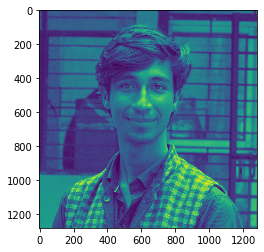

In [18]:
plt.imshow(img_test[:,:,2])

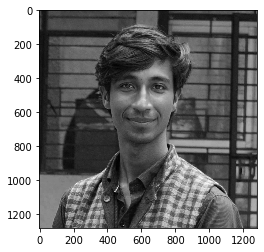

In [19]:
# Scaling Blue channel to gray
plt.imshow(img_test[:,:,2], cmap='gray')

### Removing Specific color channel

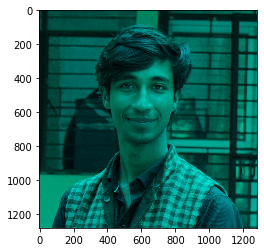

In [20]:
# Removing Red
img_test[:,:,0] = 0
plt.imshow(img_test)

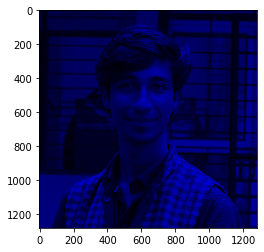

In [21]:
# Removing Green
img_test[:,:,1] = 0
plt.imshow(img_test)


# Since Red and green are removed resultant image will be Blue only

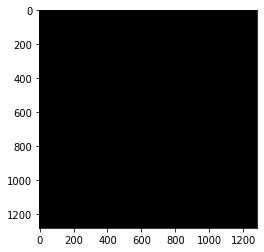

In [22]:
# Removing Blue
img_test[:,:,2] = 0
plt.imshow(img_test)


# Since all the channels are removed we will have a black image

# 3. OpenCV

In [3]:
import cv2

In [24]:
img = cv2.imread('../images/profile_color.jpeg')

In [25]:
type(img)

numpy.ndarray

In [26]:
img.shape

(1280, 1280, 3)

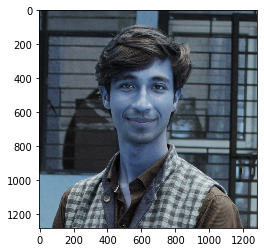

In [27]:
plt.imshow(img)

<p>Matplotlib is RGB and OpenCv uses BGR channel<br>Thus we have to convert the channels for OpenCV</p>

### Converting BGR to RGB

In [28]:
img_fix = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

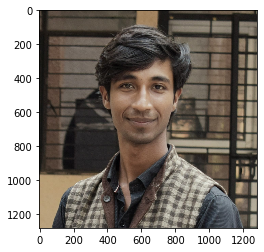

In [29]:
plt.imshow(img_fix)

### Scale to Gray

In [30]:
img_gray = cv2.imread('../images/profile_color.jpeg', cv2.IMREAD_GRAYSCALE)

In [32]:
img_gray.shape

# we will get only two dimesnions

(1280, 1280)

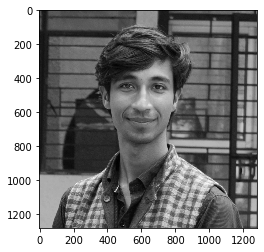

In [33]:
plt.imshow(img_gray, cmap='gray')

### Resize the Image

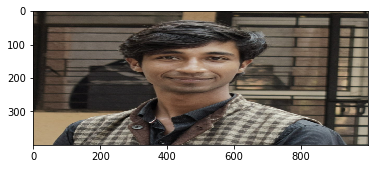

In [34]:
img_new = cv2.resize(img_fix, (1000,400))
plt.imshow(img_new)

### Resize with a ratio

In [35]:
width_ratio = 0.5
height_ratio = 0.5

In [36]:
img2 = cv2.resize(img_fix, (0,0), img_fix, width_ratio,height_ratio)

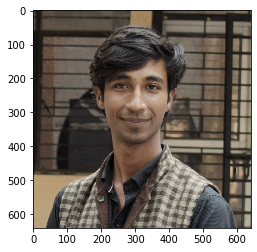

In [37]:
plt.imshow(img2)

In [38]:
img2.shape

(640, 640, 3)

### Flip on Vertical Axis

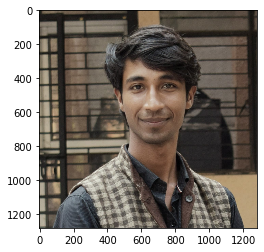

In [40]:
img_4 = cv2.flip(img_fix, 1)
plt.imshow(img_4)

### Flip on Horizontal Axis

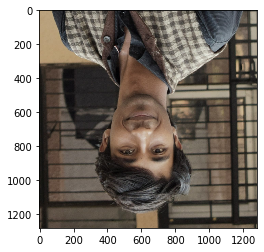

In [39]:
img_3 = cv2.flip(img_fix, 0)
plt.imshow(img_3)

### Flip on Horizontal and on Vertical axis

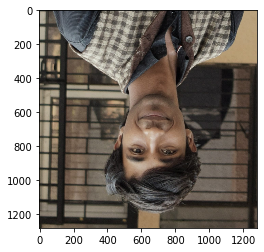

In [41]:
img_5 = cv2.flip(img_fix, -1)
plt.imshow(img_5)

### Change the size of canva

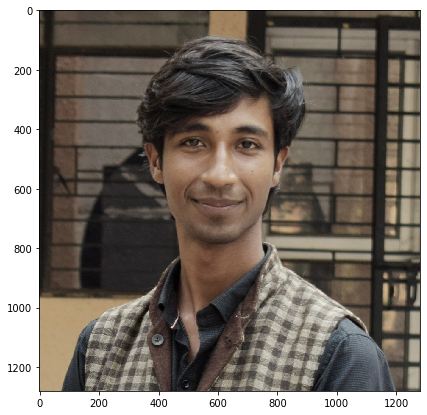

In [43]:
last_img = plt.figure(figsize=(10,7))
ilp = last_img.add_subplot(111)
ilp.imshow(img_fix)

# 4. Drawing Shapes on Image

In [4]:
#Creating a black image

black_img = np.zeros(shape=(512,512,3), dtype=np.int16)

In [6]:
black_img.shape

(512, 512, 3)

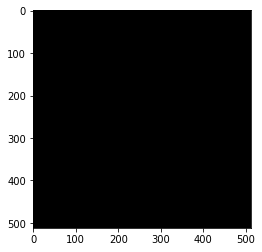

In [7]:
plt.imshow(black_img)

### Draw a Circle

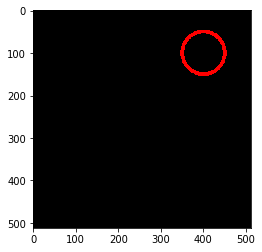

In [9]:
cv2.circle(img = black_img, center = (400, 100), radius = 50, color = (255, 0, 0), thickness = 8)
plt.imshow(black_img)

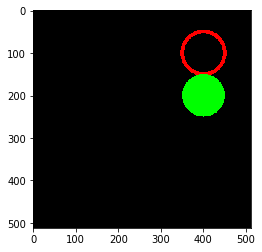

In [11]:
# Filled circle

cv2.circle(img = black_img, center = (400, 200), radius = 50, color = (0, 255, 0), thickness = -1)
plt.imshow(black_img)

### Draw Rectangle

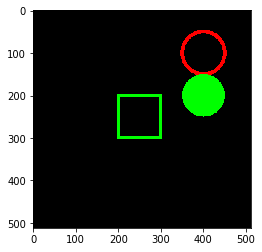

In [12]:
cv2.rectangle( black_img, pt1=(200,200), pt2=(300,300), color = (0, 255, 0), thickness = 5)
plt.imshow(black_img)
        

### Draw Triangle

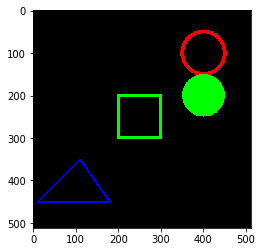

In [13]:
vertices = np.array([[10, 450],[110,350],[180,450]], np.int32)
pts =vertices.reshape(-1,1,2)
cv2.polylines(black_img, [pts], isClosed = True, color = (0,0,255), thickness = 3)
plt.imshow(black_img)


### Draw Line

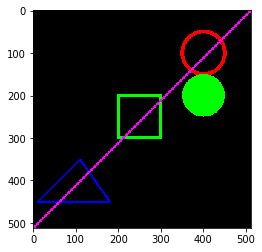

In [14]:
cv2.line(black_img, pt1 = (512,0), pt2=(0,512), color=(255,0,255), thickness = 3)
plt.imshow(black_img)

### Write text

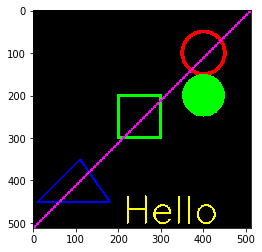

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(black_img, text='Hello', org =(210,500), fontFace = font,
           fontScale = 3, color = (255,255,0),
           thickness = 3,
           lineType = cv2.LINE_AA)

plt.imshow(black_img)

# 5. Draw with mouse

In [3]:
def draw_circle(event, x, y, flags, param):
    """
        event , x, y, flags , paramas are called by CV2 itself
    """

    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 70, (35,69,78),-1)
        
#connect function with callback
cv2.namedWindow(winname = "drawing_window")
#callback
cv2.setMouseCallback('drawing_window', draw_circle)
#using OpenCV to show image

img = np.zeros((512,512,3), np.int8)

while True:
    cv2.imshow('drawing_window', img)
    if cv2.waitKey(5) & 0xFF == 27:
        # exit window by pressing ESC
        break
        
cv2.destroyAllWindows()